In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000
data = {
    'StudentID': np.arange(1, num_samples + 1),
    'StudyHours': np.round(np.random.normal(10, 3, num_samples).clip(0), 0),  # Average around 10 hours
    'ParticipationScore': np.round(np.random.uniform(0, 100, num_samples), 0),  # Score out of 100
    'HomeworkCompletion': np.round(np.random.uniform(0, 100, num_samples), 0),  # Percentage completion
}

# Create target variable ExamScore with some dependency on the other features
data['ExamScore'] = np.round((
    5 * data['StudyHours'] +
    0.3 * data['ParticipationScore'] +
    0.2 * data['HomeworkCompletion'] +
    np.random.normal(0, 10, num_samples)
).clip(0, 100), 0)

# Convert to DataFrame
df = pd.DataFrame(data)
df.to_csv('student_exam_scores_dataset.csv', index=False)  # Save dataset


In [2]:
df.head()


,StudentID,StudyHours,ParticipationScore,HomeworkCompletion,ExamScore
0,1,11.0,17.0,22.0,58.0
1,2,10.0,10.0,4.0,56.0
2,3,12.0,64.0,11.0,93.0
3,4,15.0,71.0,34.0,98.0
4,5,9.0,3.0,80.0,43.0


In [3]:
df.describe()

,StudentID,StudyHours,ParticipationScore,HomeworkCompletion,ExamScore
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.058000,50.375000,49.447000,74.254000
std,288.819436,2.956243,28.839835,28.885109,18.731053
min,1.000000,0.000000,0.000000,0.000000,18.000000
25%,250.750000,8.000000,25.000000,25.750000,62.000000
50%,500.500000,10.000000,52.000000,49.000000,75.000000
75%,750.250000,12.000000,75.000000,74.000000,90.000000
max,1000.000000,22.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           1000 non-null   int64  
 1   StudyHours          1000 non-null   float64
 2   ParticipationScore  1000 non-null   float64
 3   HomeworkCompletion  1000 non-null   float64
 4   ExamScore           1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'StudyHours'}>],
       [<Axes: title={'center': 'ParticipationScore'}>,
        <Axes: title={'center': 'HomeworkCompletion'}>],
       [<Axes: title={'center': 'ExamScore'}>, <Axes: >]], dtype=object)

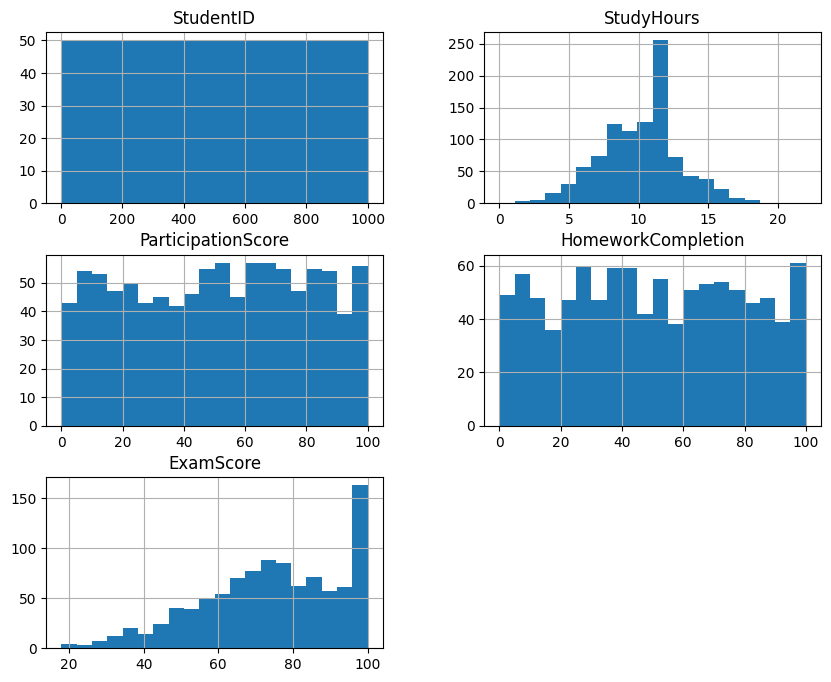

In [5]:
df.hist(figsize=(10, 8), bins=20)

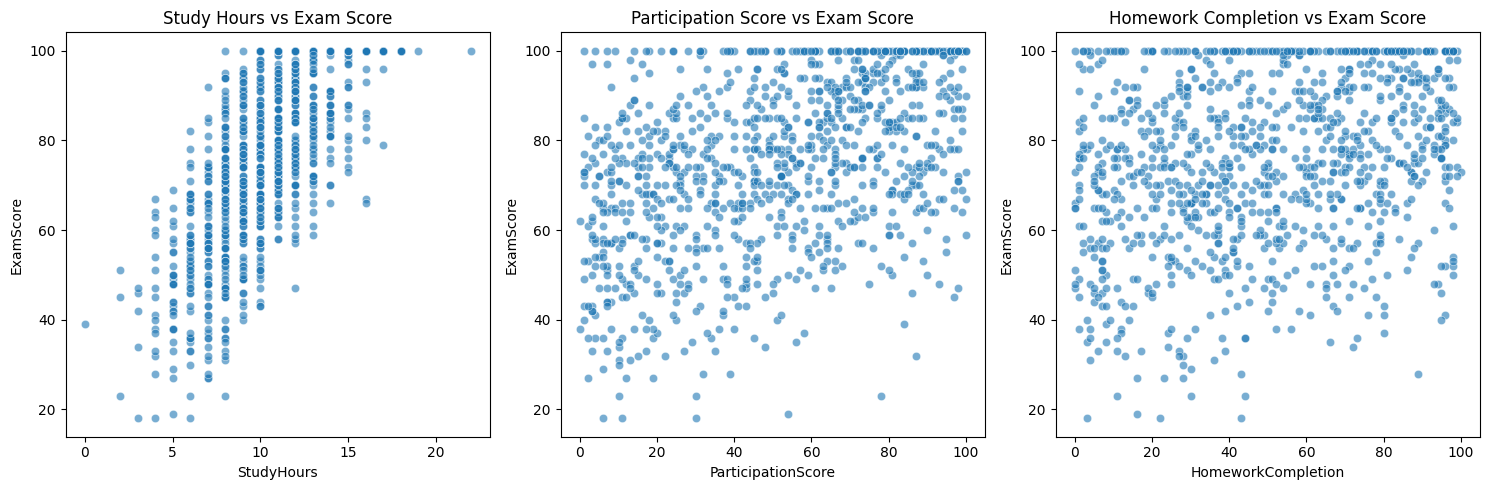

In [6]:
# Visualize relationships between each feature and ExamScore
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='StudyHours', y='ExamScore', alpha=0.6)
plt.title("Study Hours vs Exam Score")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='ParticipationScore', y='ExamScore', alpha=0.6)
plt.title("Participation Score vs Exam Score")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='HomeworkCompletion', y='ExamScore', alpha=0.6)
plt.title("Homework Completion vs Exam Score")

plt.tight_layout()
plt.show()


In [7]:
print("Original dataset size:", df.shape)

# Remove outliers based on the IQR method for specified columns

Q1 = df['ExamScore'].quantile(0.25)
Q3 = df['ExamScore'].quantile(0.75)
IQR = Q3 - Q1
# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
df = df[(df['ExamScore'] >= lower_bound) & (df['ExamScore'] <= upper_bound)]



# Display the new shape of the cleaned dataset
print("Cleaned dataset size:", df.shape)


Original dataset size: (1000, 5)
Cleaned dataset size: (996, 5)


array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'StudyHours'}>],
       [<Axes: title={'center': 'ParticipationScore'}>,
        <Axes: title={'center': 'HomeworkCompletion'}>],
       [<Axes: title={'center': 'ExamScore'}>, <Axes: >]], dtype=object)

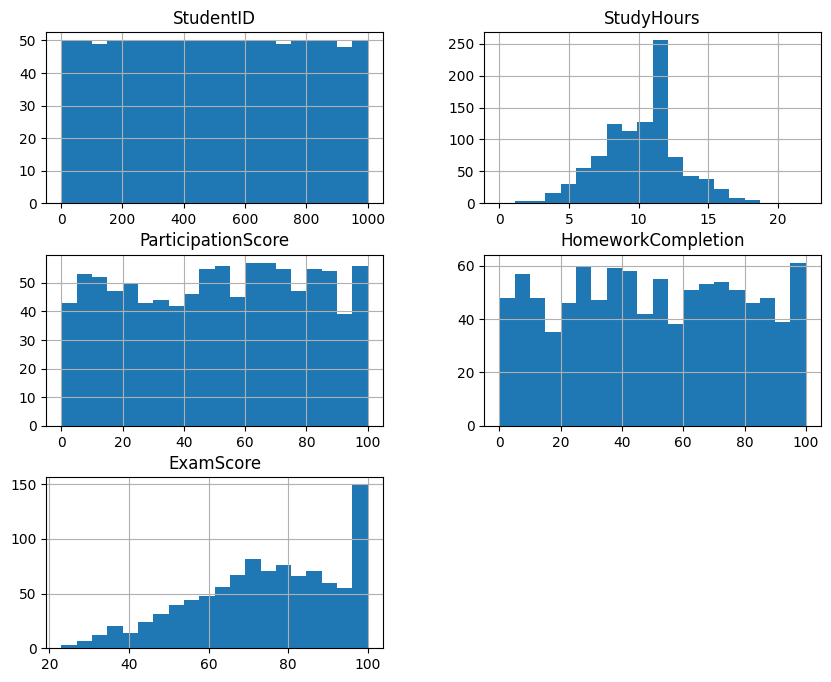

In [8]:
df.hist(figsize=(10, 8), bins=20)

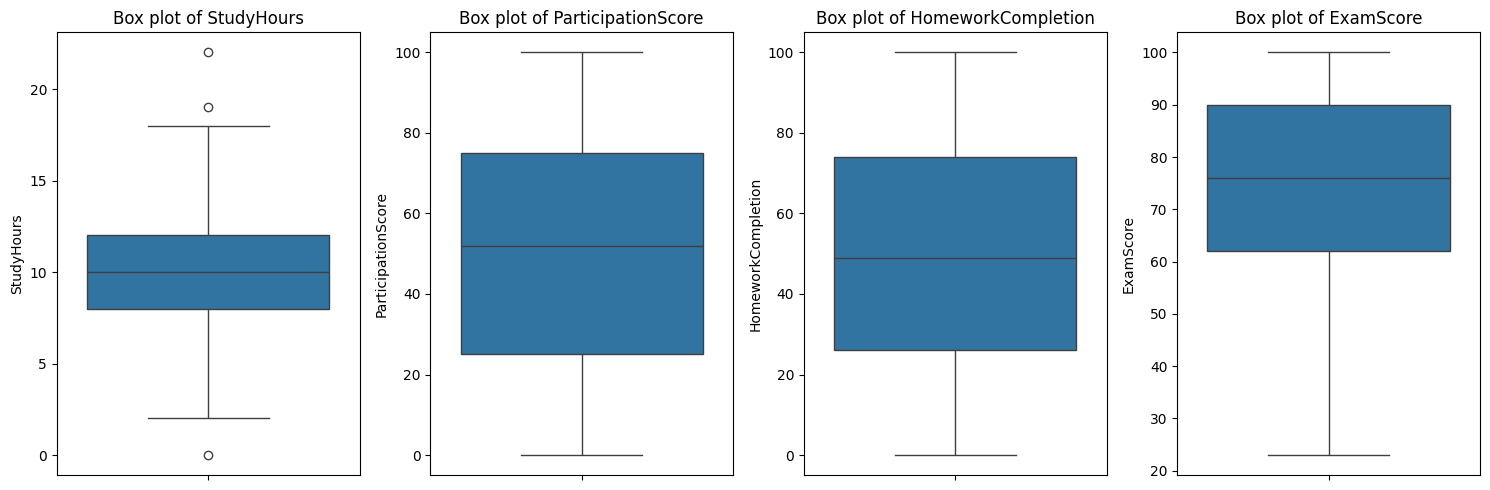

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plots to check for outliers
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(data=df, y=column)
        plt.title(f"Box plot of {column}")
    plt.tight_layout()
    plt.show()

# Plot box plots for the cleaned dataset
columns_to_check = ['StudyHours', 'ParticipationScore', 'HomeworkCompletion', 'ExamScore']
plot_boxplots(df, columns_to_check)


In [10]:
def show_heatmap(data):
    plt.figure(figsize=(15,10))
    corr=data.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr,dtype=bool))
    sns.heatmap(data=corr,annot=True,cmap='coolwarm',mask=mask)

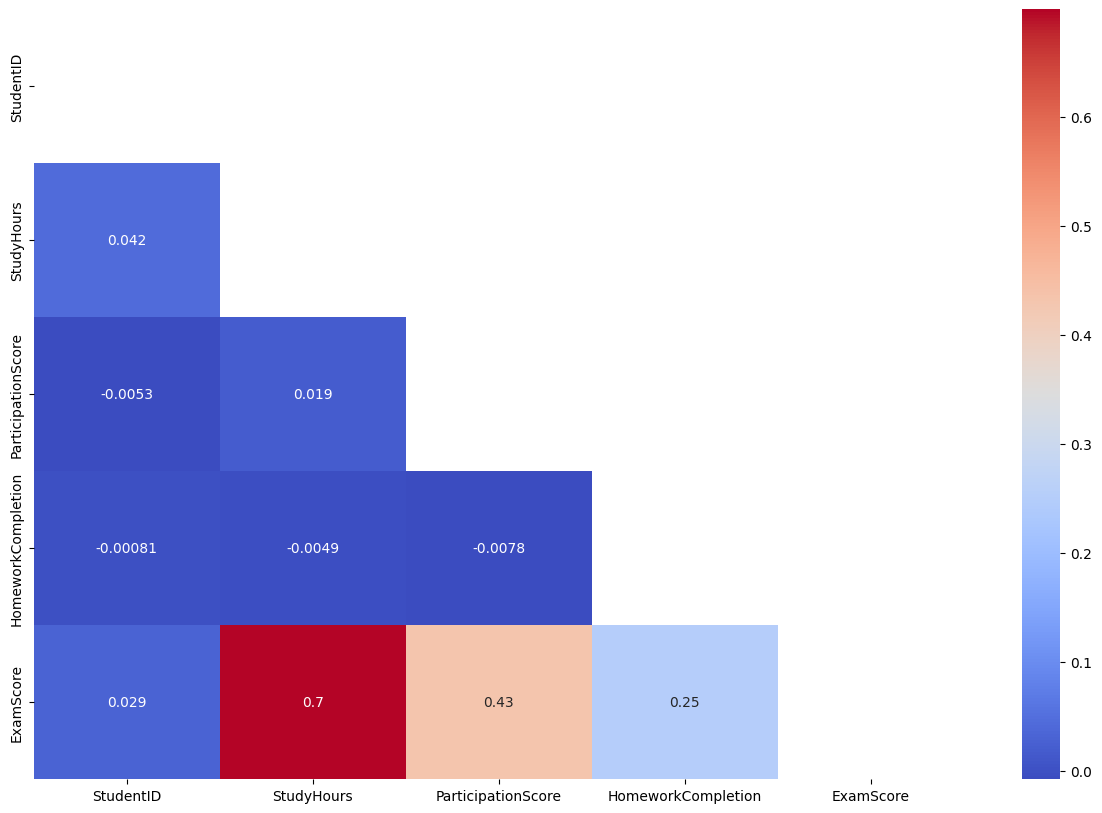

In [11]:
show_heatmap(df)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Apply log transformation to the ExamScore column
# df['LogExamScore'] = np.log(df['ExamScore'] + 1)

# Separate features and target
X = df[['StudyHours', 'ParticipationScore', 'HomeworkCompletion']]
y = df['ExamScore']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Print evaluation results and feature importance
print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Feature Importance:\n", coefficients)



Mean Squared Error: 86.83174263098458
R² Score: 0.7321366895082639
Feature Importance:
               Feature  Coefficient
0          StudyHours    12.663281
1  ParticipationScore     8.041622
2  HomeworkCompletion     4.673654


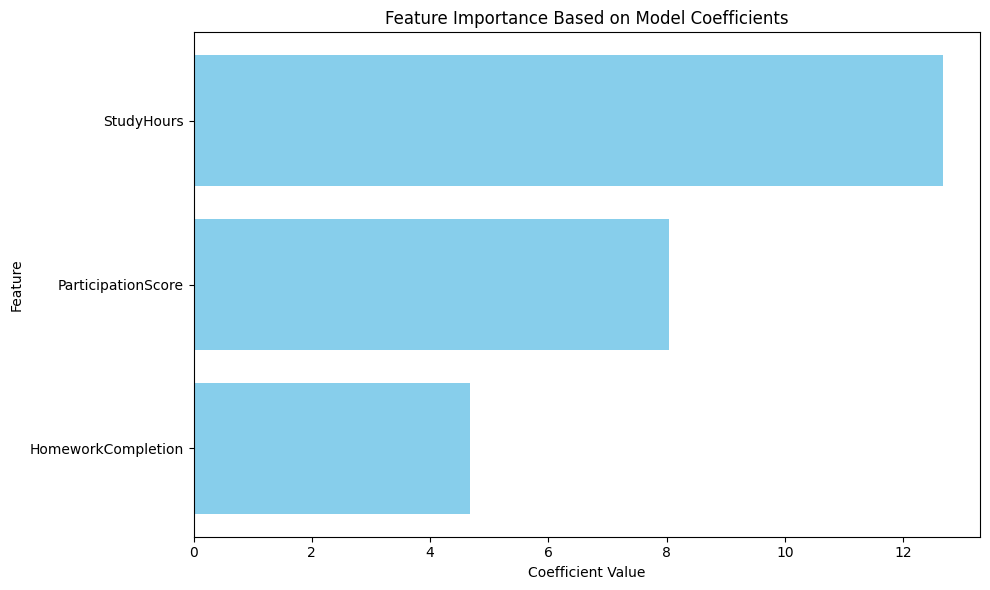

In [14]:

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Model Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define the model and the parameters to search
ridge = Ridge()
lasso = Lasso()

# Set up the parameter grid for alpha values
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best alpha for Ridge and Lasso
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')

# Fit both models
ridge_search.fit(X_train_scaled, y_train)
lasso_search.fit(X_train_scaled, y_train)

# Retrieve the best model
best_ridge = ridge_search.best_estimator_
best_lasso = lasso_search.best_estimator_

# Display best alpha values and scores
print("Best Ridge Alpha:", ridge_search.best_params_)
print("Best Ridge R²:", ridge_search.best_score_)
print("Best Lasso Alpha:", lasso_search.best_params_)
print("Best Lasso R²:", lasso_search.best_score_)


Best Ridge Alpha: {'alpha': 10}
Best Ridge R²: 0.7211888902817214
Best Lasso Alpha: {'alpha': 0.1}
Best Lasso R²: 0.7211696939391524


### Checking Regression Assumptions

a) Homoscedasticity (Constant Variance of Residuals)
This can be checked using a Residuals vs. Fitted values plot. If the variance is constant, the points should be randomly scattered without a pattern.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


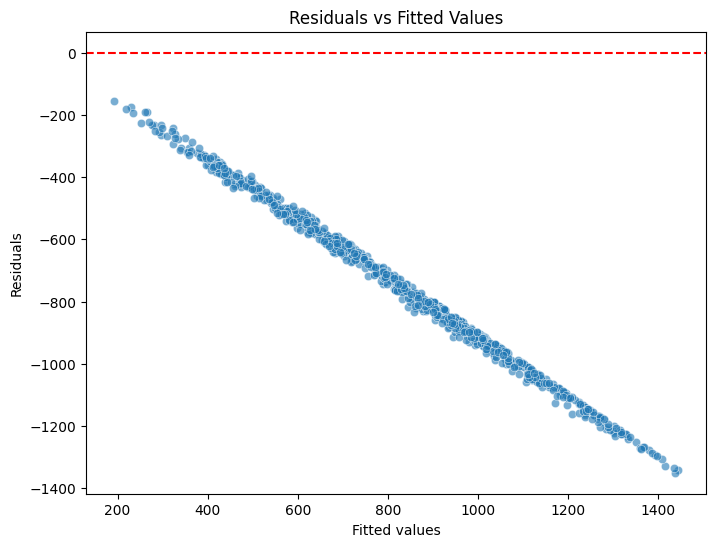

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions and calculate residuals
y_pred = best_ridge.predict(X_train)
residuals = y_train - y_pred

# Plot Residuals vs Fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


b) Normality of Residuals
The residuals should ideally follow a normal distribution, which can be checked using a histogram or Q-Q plot.

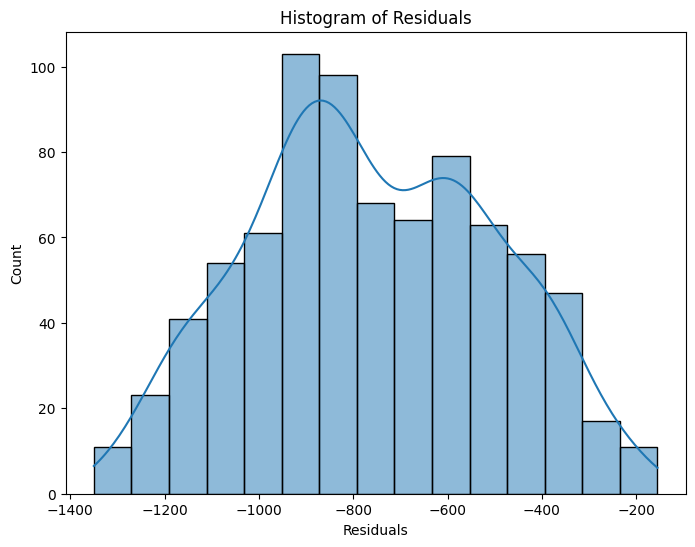

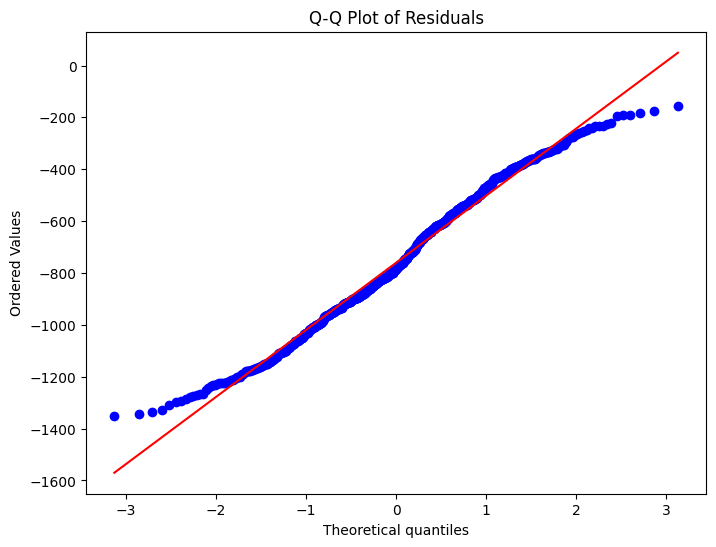

In [17]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


c) Linearity
To confirm that the relationship between each feature and the target is linear, check the scatter plots of each predictor versus the target variable.

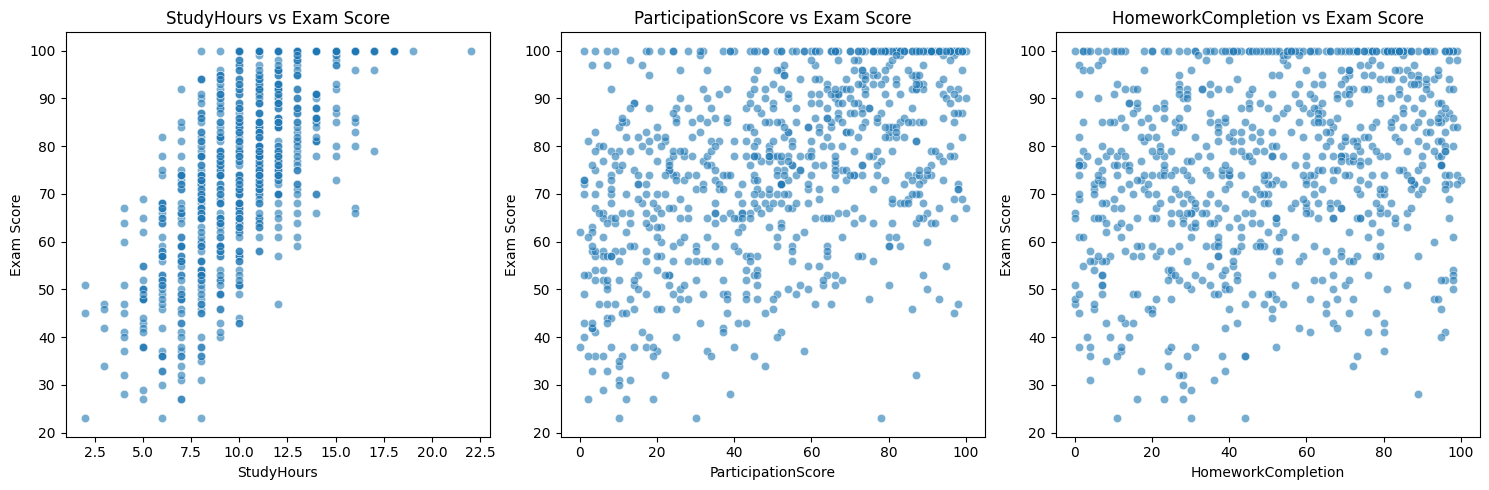

In [18]:
# Scatter plots for each feature against ExamScore
plt.figure(figsize=(15, 5))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(1, len(X_train.columns), i)
    sns.scatterplot(x=X_train[column], y=y_train, alpha=0.6)
    plt.xlabel(column)
    plt.ylabel("Exam Score")
    plt.title(f"{column} vs Exam Score")
plt.tight_layout()
plt.show()


d) Independence of Errors (No Autocorrelation)
For simple linear regression, it’s assumed that errors are independent. We can check for autocorrelation using the Durbin-Watson test.

python
Copy code


In [19]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)


Durbin-Watson statistic: 0.20065295227882554


Interpretation: Durbin-Watson values range from 0 to 4. A value near 2 indicates no autocorrelation, values closer to 0 suggest positive autocorrelation, and values closer to 4 indicate negative autocorrelation.